In [1]:
#without truncating sequence length
import pickle
from torch.autograd import Variable
import numpy as np
import torch
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
#save data
datarows = 80
#seq_length = 17500 ##major
num_sensors=98
save_file = False
plot_local = False
plot_folder = '../plots/'
pickle_path = "../pickles/"

#load sensor header details
sensor_headers = pd.read_excel("../EMPIR_Data/"+"ScopeDataWithHeadings.xlsx").columns[1:]

#now handle inputs loading
input_data_path = "../EMPIR_Data/Data/AFRC Radial Forge - Historical Data/"
file_names = os.listdir(input_data_path)

if os.path.isfile(pickle_path+"strath_full_inputs.p") == False:
    data_inputs_list = []
    for i in range(len(file_names)):
        file_csv = pd.read_csv(input_data_path+ file_names[i], encoding='cp1252')
        file_csv= file_csv.drop('Timer Tick [ms]', axis=1)
        np_data = file_csv.values[:,:]
        data_inputs_list.append(np_data)    
    pickle.dump(data_inputs_list, open( pickle_path+"strath_full_inputs.p", "wb" ) )
else:
    data_inputs_list = pickle.load( open( pickle_path+"strath_full_inputs.p", "rb" ) )

#now handle output loading
output_data_path = "../EMPIR_Data/Data/"
if os.path.isfile(pickle_path+"strath_full_outputs.p") == False:
    output_pd = pd.read_excel(output_data_path+"CMMData.xlsx")
    pickle.dump(output_pd, open( "../pickles/strath_full_outputs.p", "wb" ) )
else:
    output_pd = pickle.load( open( pickle_path+"strath_full_outputs.p", "rb" ) )



In [13]:
print(data_inputs_list)

[array([[10.       , 50.4539154,  0.       , ...,  0.       ,  1.       ,
         0.       ],
       [10.       , 50.4544226,  0.       , ...,  0.       ,  1.       ,
         0.       ],
       [10.       , 50.4536624,  0.       , ...,  0.       ,  1.       ,
         0.       ],
       ...,
       [ 0.       , 49.0694668, 34.5996094, ...,  0.       ,  1.       ,
         1.       ],
       [ 0.       , 49.0634764, 34.5996094, ...,  0.       ,  1.       ,
         1.       ],
       [ 0.       , 49.057748 ,  0.       , ...,  0.       ,  1.       ,
         1.       ]]), array([[10.       , 49.0474248,  0.       , ...,  0.       ,  1.       ,
         1.       ],
       [10.       , 49.0492342,  0.       , ...,  0.       ,  1.       ,
         1.       ],
       [10.       , 49.0493311,  0.       , ...,  0.       ,  1.       ,
         1.       ],
       ...,
       [ 0.       , 48.738746 ,  0.       , ...,  0.       ,  1.       ,
         1.       ],
       [ 0.       , 48.7387528,  

In [12]:
print(output_pd)

                                   38 dia @200  42 dia @140  42 dia @80  \
NaN        NaN      NaN   NaN           38.000       42.000      42.000   
                          NaN            0.400        0.400       0.400   
                          Part ID       -0.400       -0.400      -0.400   
31/10/2017 14:52:40 057   1             38.040       41.970      42.156   
           15:10:33 058   2             38.036       41.963      42.154   
           15:26:49 059   3             38.024       41.955      42.141   
           15:51:49 060   4             38.017       41.955      42.136   
           16:07:37 061   5             38.007       41.943      42.135   
           16:23:49 062   6             38.006       41.943      42.136   
           16:39:21 063   7             38.000       41.928      42.123   
           16:54:30 064   8             37.994       41.932      42.118   
           17:09:13 065   9             37.997       41.925      42.121   
           17:27:13 066  

In [15]:
#extract necessary output values
output_headers = output_pd.columns
base_val = output_pd.values[0,:]

output_val = output_pd.values[3:,:]
output_val = output_val[:-8,:]
output_val = Variable(torch.from_numpy(output_val).float())

np_data_outputs = output_val.cpu().detach().numpy()

#extract error from expected base values
for output in range(np_data_outputs.shape[1]):
    np_data_outputs[:,output] -=base_val[output]

DescribeResult(nobs=80, minmax=(17760, 23853), mean=18717.9125, variance=3708312.1061708857, skewness=1.9623641891918966, kurtosis=1.9042620406769393)


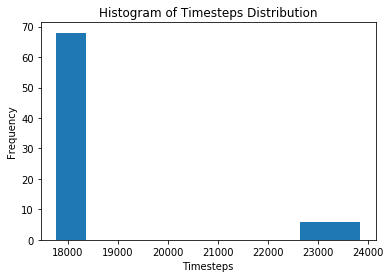

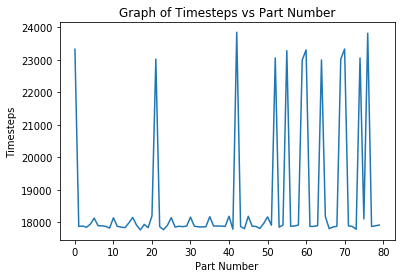

In [16]:
#investigate timesteps of input sensors
np_data_timesteps = np.array([data_inputs_list[i].shape[0] for i in range(len(data_inputs_list))])
np_data_inputs_list = np.array(data_inputs_list)
print(stats.describe(np_data_timesteps))
plt.title("Histogram of Timesteps Distribution")
plt.hist(np_data_timesteps)
plt.xlabel("Timesteps")
plt.ylabel("Frequency")
plt.savefig(plot_folder+'histogram_vs_timestep.png', bbox_inches="tight")
plt.show()

plt.title("Graph of Timesteps vs Part Number")
plt.plot(np.arange(len(np_data_timesteps)),np_data_timesteps)
plt.xlabel("Part Number")
plt.ylabel("Timesteps")
plt.savefig(plot_folder+'timesteps_vs_partnumber.png', bbox_inches="tight")
plt.show()
#from plot, seems that there are two categories of ranges: ~18000 and ~23000


In [17]:
#lets have full plots of both ranges
#separate data into two ranges
index_18k =np.arange(datarows)[np_data_timesteps<=20000]
index_23k =np.arange(datarows)[np_data_timesteps>20000]
np_data_inputs_18k = np_data_inputs_list[index_18k]
np_data_inputs_23k = np_data_inputs_list[index_23k]


In [35]:
print(index_18k)
print(index_23k)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 43 44 45 46 47 48 49 50
 51 53 54 56 57 58 61 62 63 65 66 67 68 71 72 73 75 77 78 79]
[ 0 21 42 52 55 59 60 64 69 70 74 76]


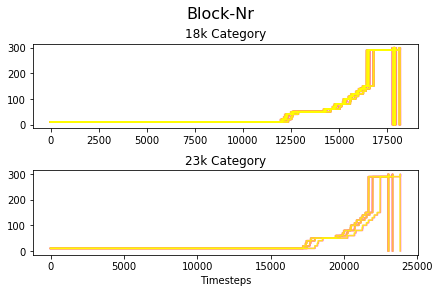

<Figure size 432x288 with 0 Axes>

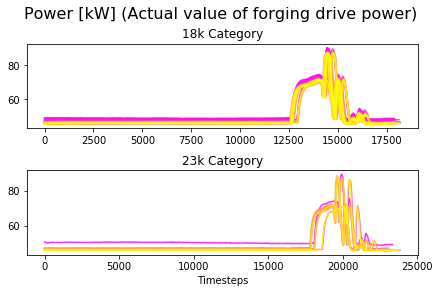

<Figure size 432x288 with 0 Axes>

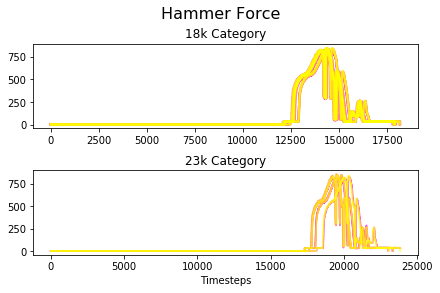

<Figure size 432x288 with 0 Axes>

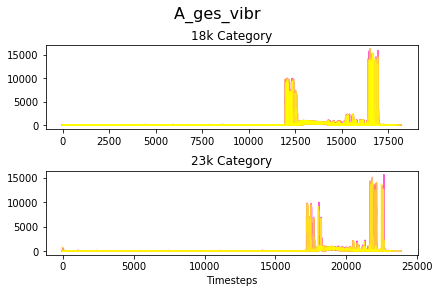

<Figure size 432x288 with 0 Axes>

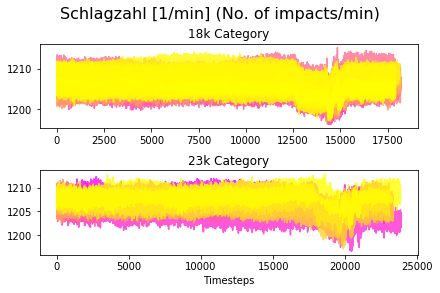

<Figure size 432x288 with 0 Axes>

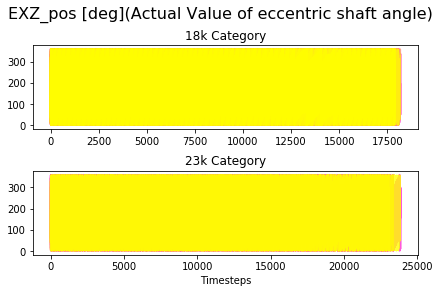

<Figure size 432x288 with 0 Axes>

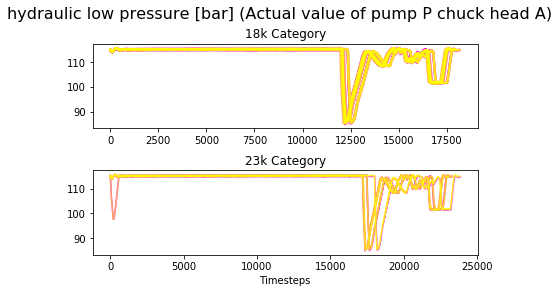

<Figure size 432x288 with 0 Axes>

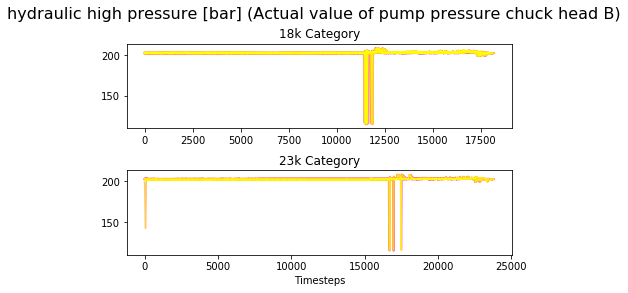

<Figure size 432x288 with 0 Axes>

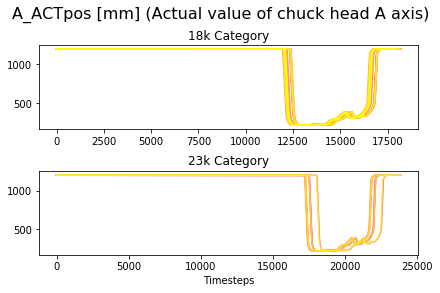

<Figure size 432x288 with 0 Axes>

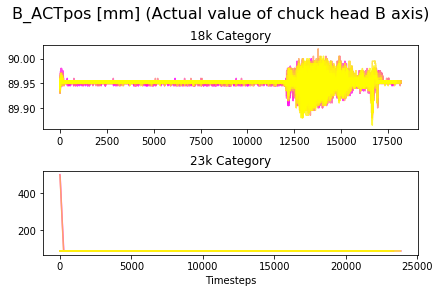

<Figure size 432x288 with 0 Axes>

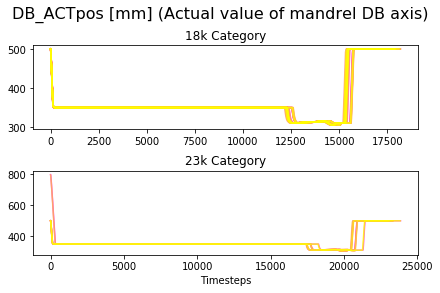

<Figure size 432x288 with 0 Axes>

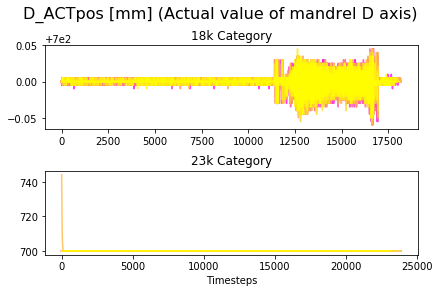

<Figure size 432x288 with 0 Axes>

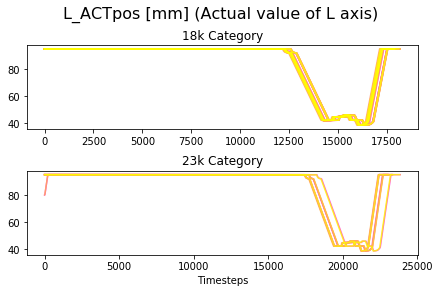

<Figure size 432x288 with 0 Axes>

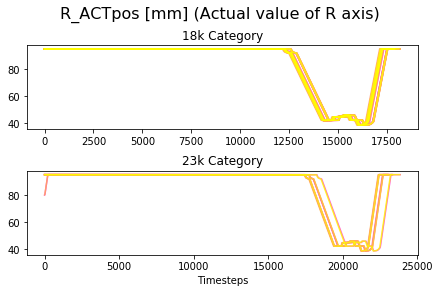

<Figure size 432x288 with 0 Axes>

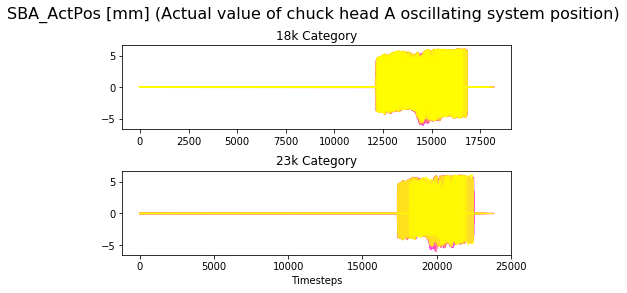

<Figure size 432x288 with 0 Axes>

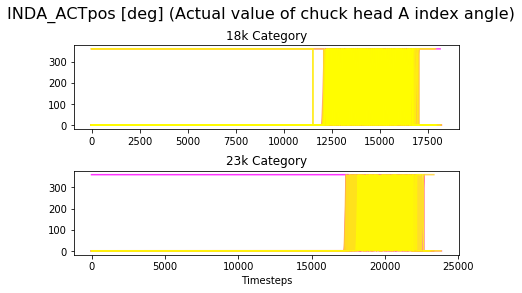

<Figure size 432x288 with 0 Axes>

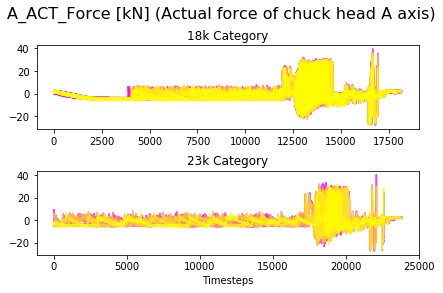

<Figure size 432x288 with 0 Axes>

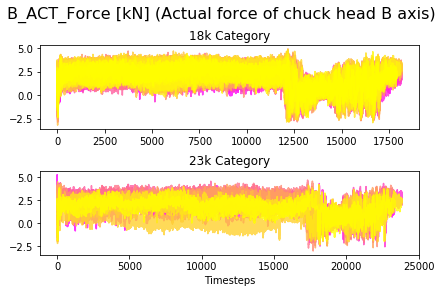

<Figure size 432x288 with 0 Axes>

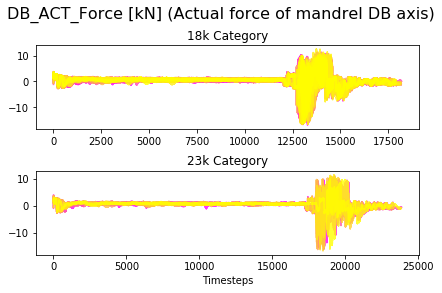

<Figure size 432x288 with 0 Axes>

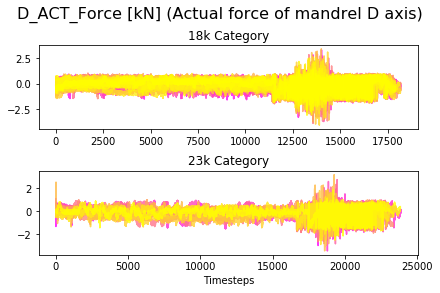

<Figure size 432x288 with 0 Axes>

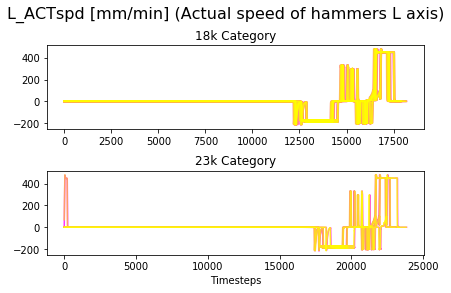

<Figure size 432x288 with 0 Axes>

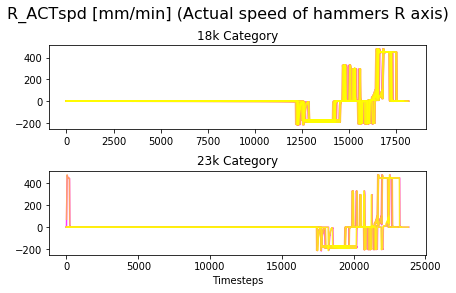

<Figure size 432x288 with 0 Axes>

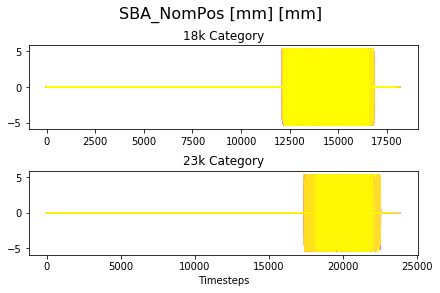

<Figure size 432x288 with 0 Axes>

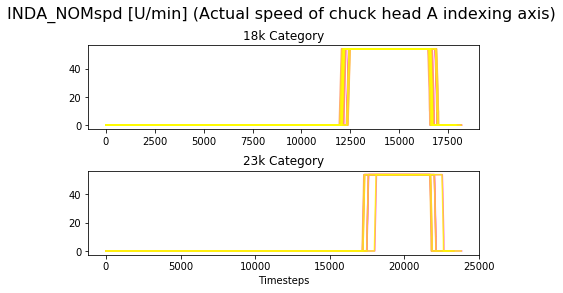

<Figure size 432x288 with 0 Axes>

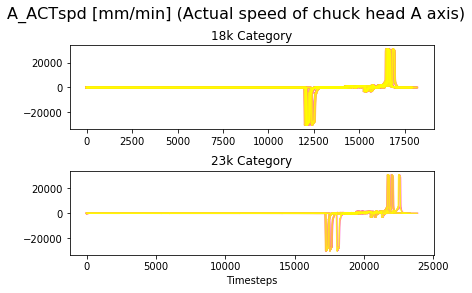

<Figure size 432x288 with 0 Axes>

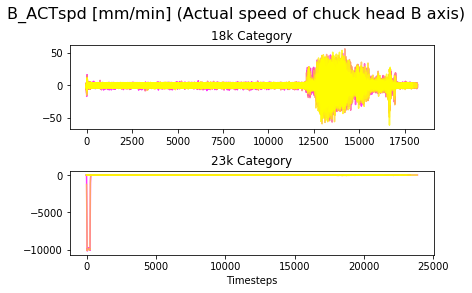

<Figure size 432x288 with 0 Axes>

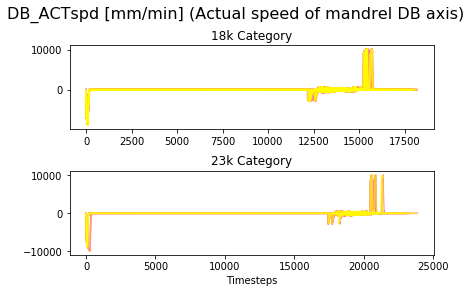

<Figure size 432x288 with 0 Axes>

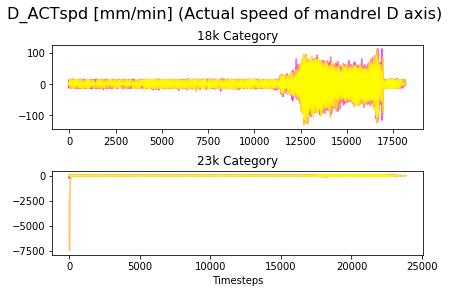

<Figure size 432x288 with 0 Axes>

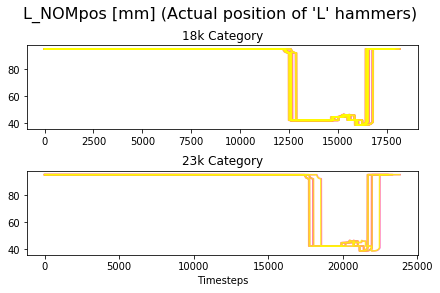

<Figure size 432x288 with 0 Axes>

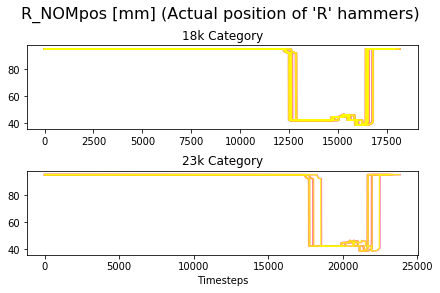

<Figure size 432x288 with 0 Axes>

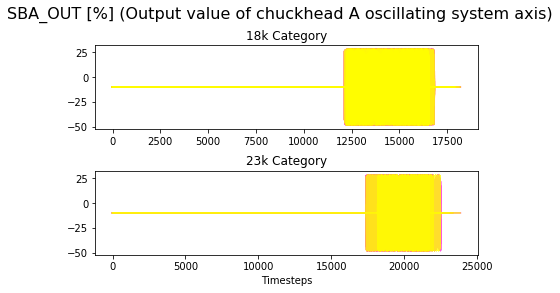

<Figure size 432x288 with 0 Axes>

KeyboardInterrupt: 

In [18]:
#this section plots all the sensors grouped into 18k & 23k
#this takes time to run
save_file = False
plot_local = True

#plot in local or save into file
if save_file or plot_local:
    for sensor_index in range(num_sensors):
    #sensor_index = 1
        sensor_detail = sensor_headers[sensor_index]
        num_parts = len(data_inputs_list)
        color_plots = plt.cm.viridis(np.linspace(0,1,num_parts))
        color_plots[:,3] = 0.8
          
        #begin plotting, loop for every part data with different color  
        fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)
        
        #prepare plot data for 18k 
        num_parts = np_data_inputs_18k.shape[0]
        color_plots = plt.cm.spring(np.linspace(0,1,num_parts))
        color_plots[:,3] = 0.8
        
        for parts_row in range(num_parts):
            sensor_data_row = np_data_inputs_18k[parts_row][:,sensor_index]    
            ax1.plot(sensor_data_row,color=color_plots[parts_row])
        
        #prepare plot data for 23k 
        num_parts = np_data_inputs_23k.shape[0]
        color_plots = plt.cm.spring(np.linspace(0,1,num_parts))
        color_plots[:,3] = 0.8
        
        for parts_row in range(num_parts):
            sensor_data_row = np_data_inputs_23k[parts_row][:,sensor_index]
            ax2.plot(sensor_data_row,color=color_plots[parts_row])
        
        #set axes and titles
        fig.suptitle(sensor_detail, fontsize=16)
        ax1.set_title("18k Category")
        ax2.set_title("23k Category")
        ax2.set_xlabel("Timesteps")
        
        #save plots
        if(save_file):
            plt.savefig(plot_folder+'sensors/'+'sensor_'+str(sensor_index)+'.png', bbox_inches="tight")
        if(plot_local):
            plt.show()
        plt.clf()

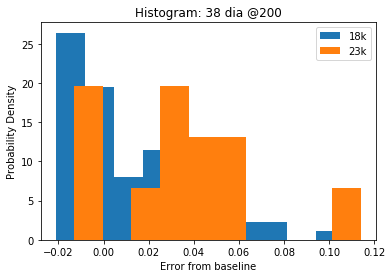

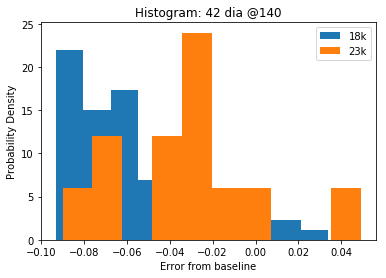

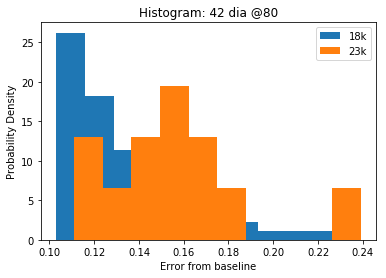

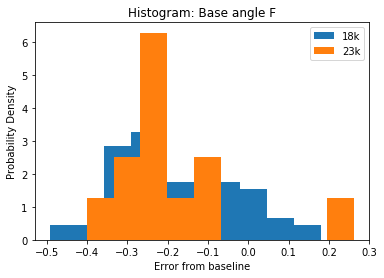

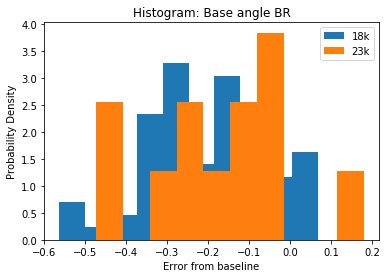

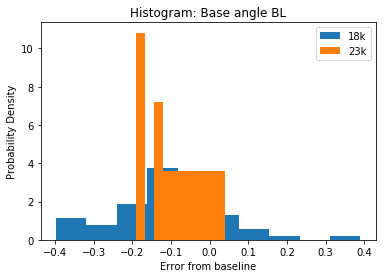

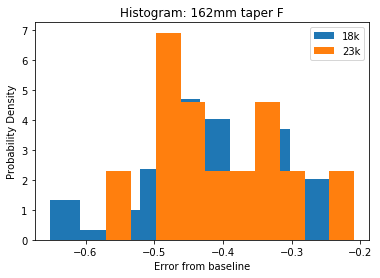

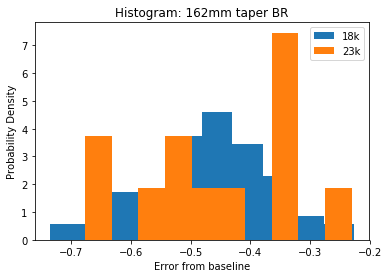

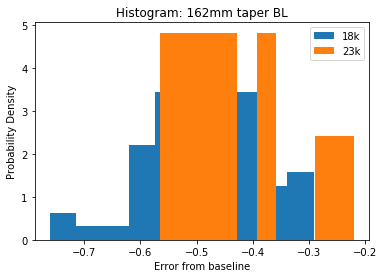

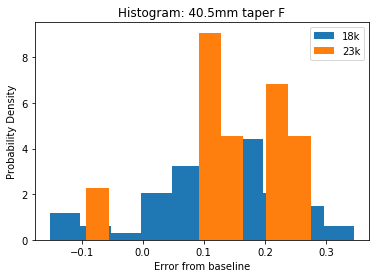

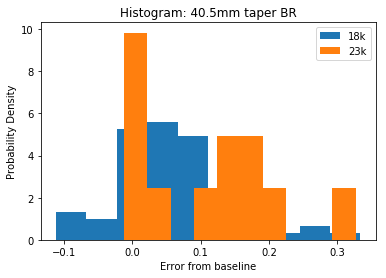

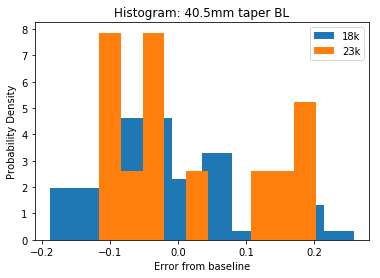

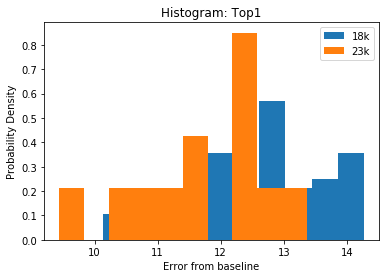

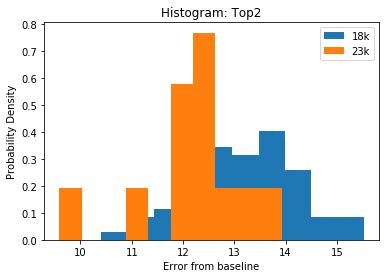

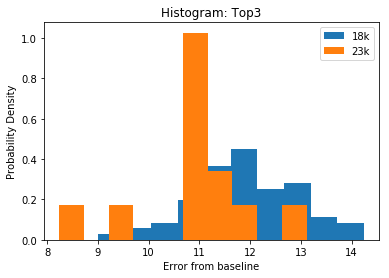

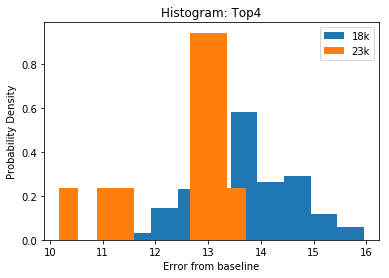

       38 dia @200  42 dia @140  42 dia @80  Base angle F  Base angle BR  \
count    68.000000    68.000000   68.000000     68.000000      68.000000   
mean      0.008794    -0.058720    0.132941     -0.179853      -0.205236   
std       0.027100     0.028595    0.027481      0.148605       0.146418   
min      -0.021000    -0.092999    0.103001     -0.491997      -0.561996   
25%      -0.010499    -0.081001    0.111750     -0.283249      -0.297749   
50%      -0.001999    -0.066002    0.124500     -0.214001      -0.208000   
75%       0.023998    -0.044998    0.143501     -0.056749      -0.106750   
max       0.106998     0.034000    0.231998      0.181000       0.068001   

       Base angle BL  162mm taper F  162mm taper BR  162mm taper BL  \
count      68.000000      68.000000       68.000000       68.000000   
mean       -0.106427      -0.405029       -0.461852       -0.485662   
std         0.139638       0.107721        0.102265        0.099390   
min        -0.397003      -0.65

<Figure size 432x288 with 0 Axes>

In [19]:
#perform t-test statistics
#now lets compare outputs of 18k vs 23k
np_data_outputs_18k = np_data_outputs[index_18k]
np_data_outputs_23k = np_data_outputs[index_23k]

for output in range(np_data_outputs.shape[1]):
    plt.title("Histogram: "+output_headers[output])
    plt.hist(np_data_outputs_18k[:,output],density=True)
    plt.hist(np_data_outputs_23k[:,output],density=True)
    plt.xlabel("Error from baseline")
    plt.ylabel("Probability Density")
    plt.legend(labels=['18k','23k'],loc='best')
    #plt.savefig(plot_folder+'outputs/'+'output_histogram_'+str(output)+'.png', bbox_inches="tight")
    plt.show()
    plt.clf()
   
#print statistics for outputs
df_data_outputs_18k = pd.DataFrame(np_data_outputs_18k,columns=output_headers)
df_data_outputs_23k = pd.DataFrame(np_data_outputs_23k,columns=output_headers)

print(df_data_outputs_18k.describe())
print(df_data_outputs_23k.describe())

#significance test
std_error = np.sqrt(df_data_outputs_18k.std()**2/df_data_outputs_18k.count()[0]+df_data_outputs_23k.std()**2/df_data_outputs_23k.count()[0])
t_stats = (df_data_outputs_18k.mean()-df_data_outputs_23k.mean())/std_error

#check if difference is statistically significant with 95% confidence
print(np.abs(t_stats)>1.98)
#NOTE: there are some dimensions which show statistically significant differences


In [30]:
#this section preprocess the raw time series into features of mean, std deviation, kurtosis, skewness
#convert into features, drop useless columns
if 'df_features_inputs' in globals():
    del df_features_inputs
for sensor_number in range(num_sensors):
    for part_number in range(datarows):
        desc = stats.describe(np_data_inputs_list[part_number][:,sensor_number])
        desc_dict={'means_'+str(sensor_number):desc.mean.flatten(),'std_'+str(sensor_number):np.sqrt(desc.variance.flatten()),'skewness_'+str(sensor_number):np.array([desc.skewness]),'kurtosis_'+str(sensor_number):np.array([desc.kurtosis])}
        
        if 'df_features_inputs_perSensor' not in globals():
            df_features_inputs_perSensor =pd.DataFrame(desc_dict)
        else:   
            df_features_inputs_perSensor_temp =pd.DataFrame(desc_dict)
            df_features_inputs_perSensor=df_features_inputs_perSensor.append(df_features_inputs_perSensor_temp,ignore_index=True)
    if 'df_features_inputs' not in globals():
        df_features_inputs =df_features_inputs_perSensor
    else:
        df_features_inputs = df_features_inputs.join(df_features_inputs_perSensor,rsuffix=str(sensor_number))
    if 'df_features_inputs_perSensor' in globals():
        del df_features_inputs_perSensor

timesteps_count= pd.DataFrame({'timesteps_count':np_data_timesteps})
df_features_inputs.join(timesteps_count,rsuffix=str(sensor_number))

#create dataFrame of output dimensions
df_outputs = pd.DataFrame(np_data_outputs)
df_outputs.columns = ['output_'+str(i) for i in range(df_outputs.shape[1])]

#final df of inputs and outputs
df_final_combine = df_features_inputs.join(df_outputs,rsuffix=str(sensor_number))


In [29]:
print(df_final_combine)

      means_0      std_0  skewness_0  kurtosis_0    means_1     std_1  \
0   38.412209  69.134173    2.894227    7.477491  52.446942  7.170838   
1   47.058824  76.858495    2.420675    4.764981  52.155984  8.307422   
2   47.107780  76.904445    2.418371    4.752098  51.943073  8.277867   
3   46.665733  76.356975    2.442058    4.888376  51.719098  8.303601   
4   46.985393  76.787427    2.424315    4.784535  51.528236  8.260487   
5   46.375876  76.247151    2.453552    4.940912  51.296961  8.182807   
6   46.844223  76.620640    2.432233    4.827849  51.209642  8.219172   
7   46.953872  76.726401    2.427697    4.801567  50.870182  8.148452   
8   47.006548  76.826604    2.423772    4.778229  50.628076  8.180441   
9   47.064040  76.894177    2.420654    4.760579  50.438316  8.195130   
10  46.435229  76.433781    2.449470    4.908597  50.161185  8.101865   
11  46.903576  76.787473    2.427703    4.795945  50.111898  8.161573   
12  46.592705  76.341931    2.444063    4.896540  4

In [31]:
#remove useless inputs
useless_columns = []
for col in df_final_combine:
    if len(df_final_combine[col].unique()) == 1:
        useless_columns.append(col)

count_useless_sensors = []
for col in useless_columns:
    if 'means' in col:
        count_useless_sensors.append(col)
print("Useless sensors: ")
print(count_useless_sensors)
print("Count: "+ str(len(count_useless_sensors)))

#drop useless columns
df_final_combine_dropped = df_final_combine.drop(useless_columns,axis=1)

Useless sensors: 
['means_33', 'means_35', 'means_56', 'means_57', 'means_59', 'means_60', 'means_82', 'means_83', 'means_86', 'means_87', 'means_88', 'means_91', 'means_92', 'means_93', 'means_94', 'means_95', 'means_96']
Count: 17


In [ ]:
#save into csv 
df_final_combine_dropped.to_csv("../data_massaged/"+'data_massaged_v1.csv')

#pickle it for convenience and rename it
pickle.dump(df_final_combine_dropped, open( "../pickles/strath_preproc_data.p", "wb" ) )
strath_preproc_data = pickle.load( open( pickle_path+"strath_preproc_data.p", "rb" ) )
